## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

## ANSWER:

## 1) Solve By Using K-means Clustering

In [3]:
# Import the libaries
import numpy as np # Linear algebra
import pandas as pd #Data processing 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read the file
data=pd.read_csv("crime.csv")

In [5]:
#Let's draw heads
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
#Let's check info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
#Let's describe the data
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
#Let's find null values in columns
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

 No Nans found!!

## Normaliizing data for nay type of clustering

In [9]:
data=pd.read_csv("crime.csv",index_col=0)

In [10]:
# Standardize the data to normal distributio 
from sklearn import preprocessing
data_standardized  = preprocessing.scale(data)
print(data_standardized)
data_standardized = pd.DataFrame(data_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

# K-means Clustering
The number of clusters has to be be decided when k-means clustering is used unlike hierarchical clustering. Let's start with creating scree plot. Scree plot is a plot between WCSS (Within cluster sum of squares) and number of clusters. Without sound domain knowledge or in the scenarios with unclear motives, the scree plots help us decide the number of clusters to specify.



In [19]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

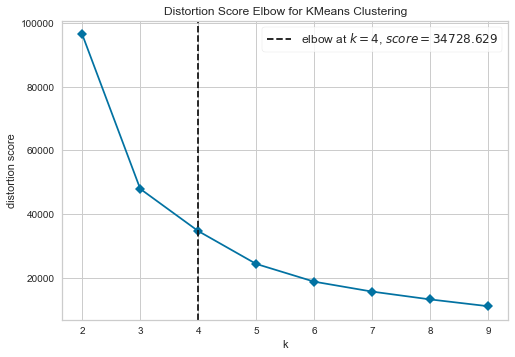

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,10),timings= False)
visualizer.fit(data)
visualizer.show()

The scree plot levels off at k=4 and let's use it to determine the clusters.


In [21]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++' , random_state = 42)
y_kmeans = kmeans.fit_predict(data_standardized)

y_kmeans

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [22]:
#Beginning of the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

#New list called cluster
cluster = list(y_kmeans1)
#Adding cluster to our data set
data['cluster'] = cluster

In [23]:
#Mean of cluster 1 to 4 
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,13.9,243.6,53.8,21.4
2,5.7,138.9,73.9,18.8
3,3.6,78.5,52.1,12.2
4,10.8,257.4,76.0,33.2


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

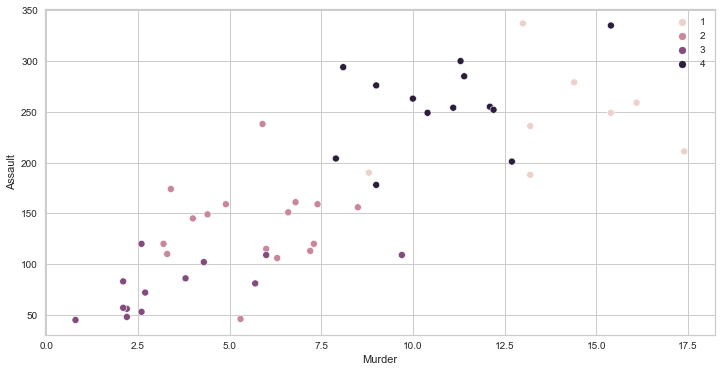

In [24]:
import seaborn as sns

plt.figure(figsize =(12,6))
sns.scatterplot(x=data['Murder'], y= data['Assault'],hue=y_kmeans1)

The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Assaults. And there is a positive correlation between occurrence of Murder and Assault in different states.

### States in cluster1

In [1]:
data[data['cluster']==1]

NameError: name 'data' is not defined

## 2) Solve By Using Hierarchical Clustering

In [26]:
crime =pd.read_csv("crime.csv")

In [27]:
# Peeking at the dataset
crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Our dataset consists of crime rates for Murder, Assault, UrbanPop and Rape

In [28]:
# Let's see how many rows and columns we got
crime.shape

(50, 5)

In [29]:
#Let's see some facts here
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### We have 50 rows and Columns.

In [30]:
# Let's get some statistsics summary
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [31]:
# Check for missing values.
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

 ### We have no missing values!

In [107]:
crime =pd.read_csv("crime.csv")

In [108]:
crime = crime.

rename(columns={'Unnamed: 0': 'State'})

In [109]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## 1) Murder Rate

<AxesSubplot:xlabel='State'>

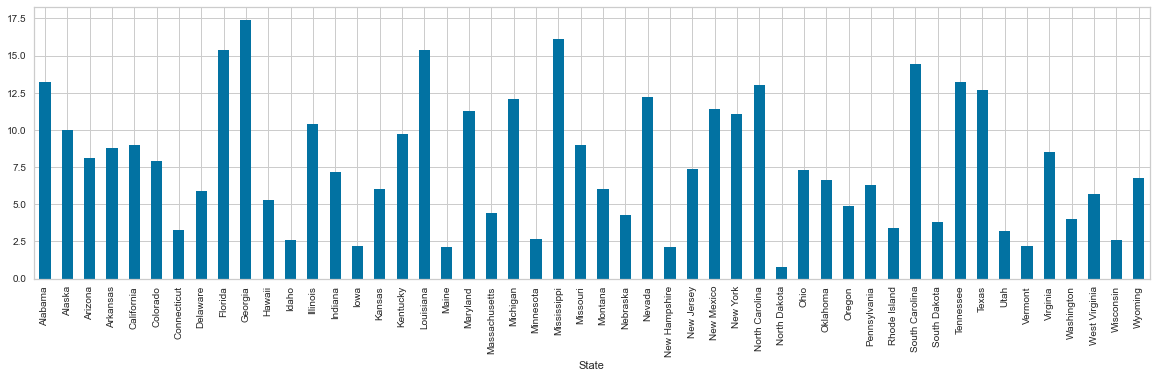

In [110]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Murder'].max().plot(kind='bar')

## Observations:
Highest Murder Rate : Georgia and Missisippi
Lowest Murder Rate : Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.



## 2)Assault Rate

<AxesSubplot:xlabel='State'>

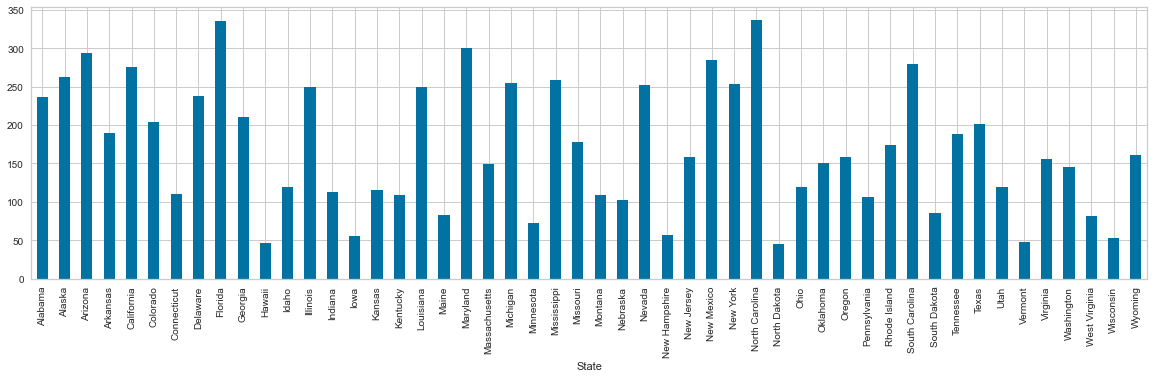

In [111]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Assault'].max().plot(kind='bar')

## Observation:
Highest Assualt Rate : Florida and North California.
Lowest Assualt Rate : Hawaii, North Dakota, Vermont , New Hampshire and Wisconsin.

## Rape Rate

<AxesSubplot:xlabel='State'>

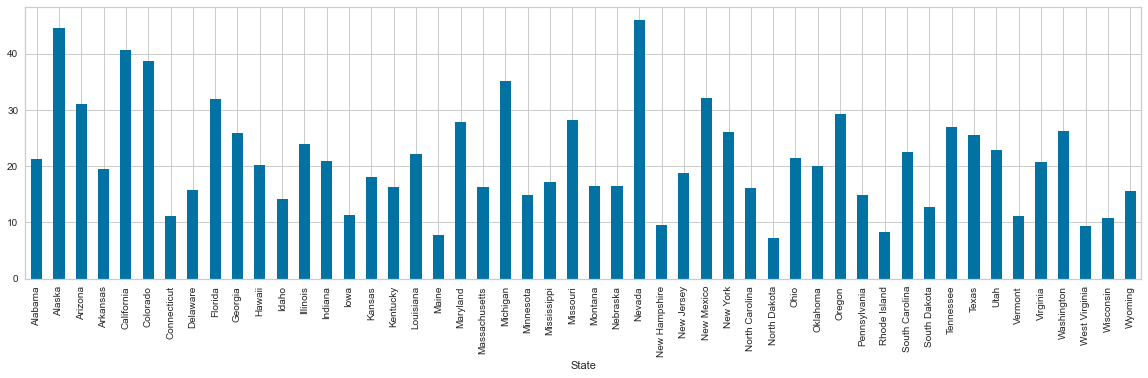

In [112]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Rape'].max().plot(kind='bar')

## Observations:
Highest UrbanPop Rate : Nevada and Alaska.
Lowest UrbanPop Rate : Maine, North Dakota,Vermont,Connecticut,New Hampshire, Wisconsin,Rhode Island and West Virginia

## 4) UrbanPop : Percent Urban Population

<AxesSubplot:xlabel='State'>

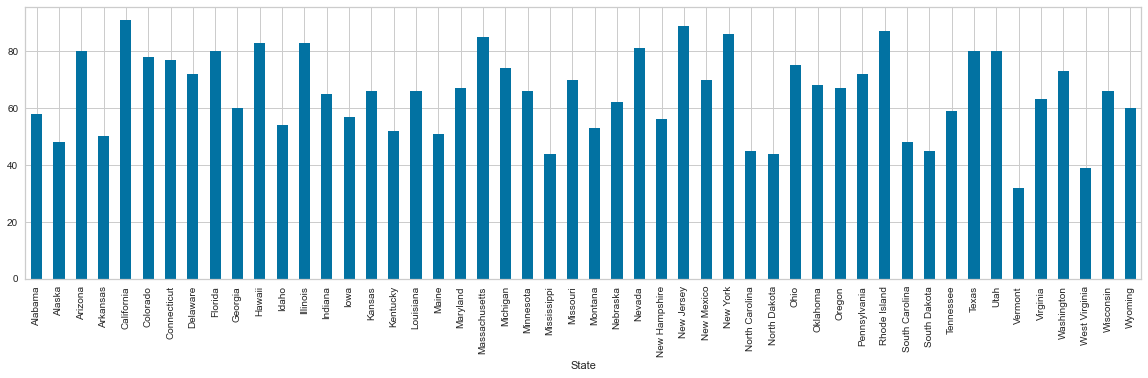

In [113]:
plt.figure(figsize=(20,5))
crime.groupby('State')['UrbanPop'].max().plot(kind='bar')

Text(0, 0.5, 'Murder Rate')

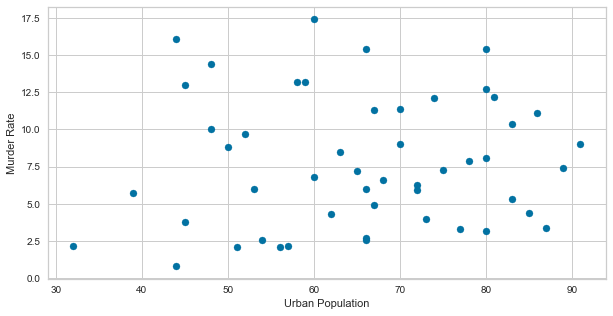

In [114]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder', data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Assault Rate')

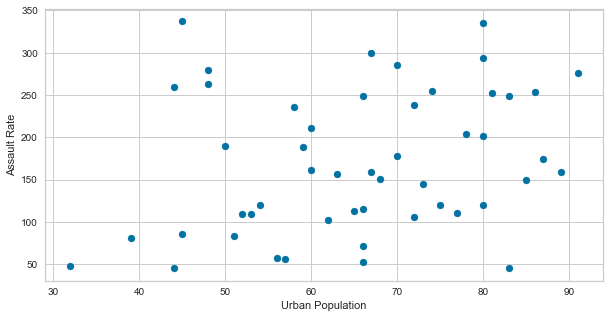

In [115]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

Text(0, 0.5, 'Rape Rate')

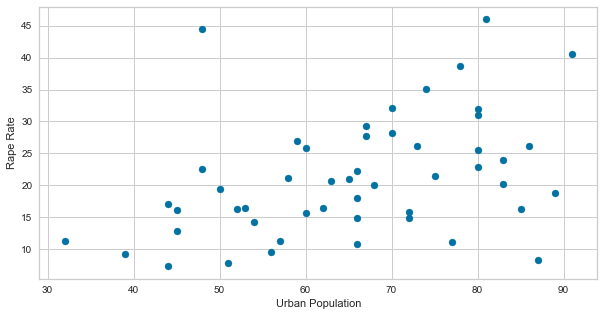

In [116]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

In [117]:
crime = pd.read_csv("crime.csv")

In [118]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [119]:
#Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

### 1)Single Linkage

The distance between 2 clusters is defined as the shortest distance between points in the two clusters

Text(0, 0.5, 'Euclidean distances')

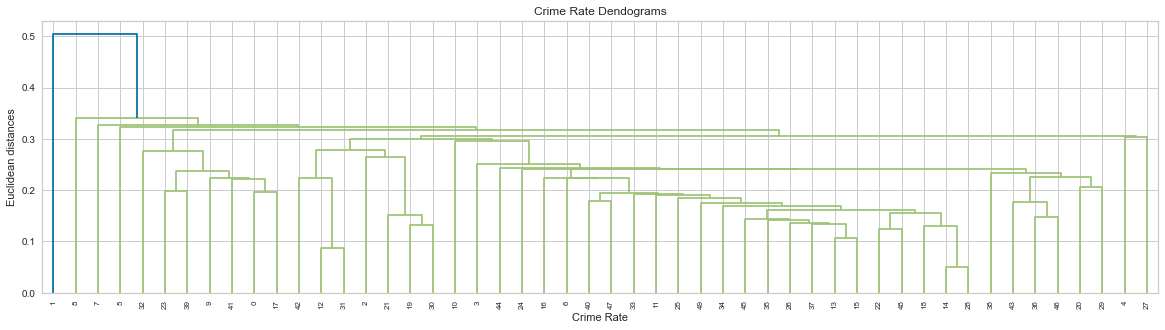

In [120]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dendrogram=sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

### 2)Complete Linkage:
The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

Text(0, 0.5, 'Euclidean distances')

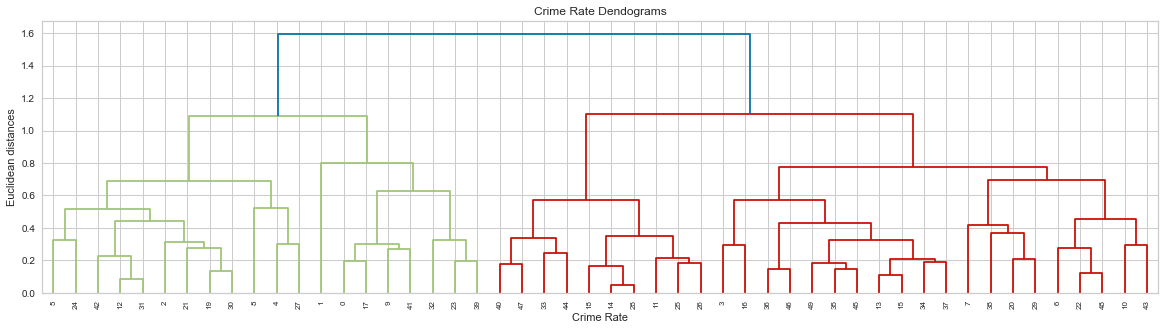

In [121]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dendrogram=sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

### 3)Average Linkage
The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.



Text(0, 0.5, 'Euclidean distances')

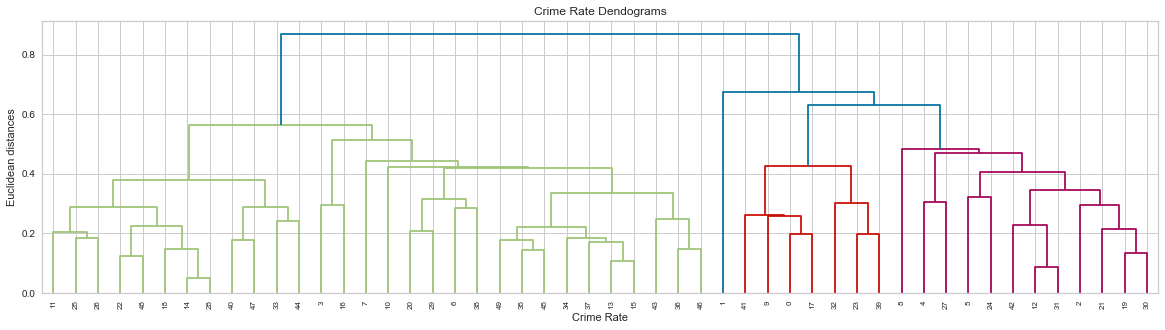

In [122]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dendrogram=sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

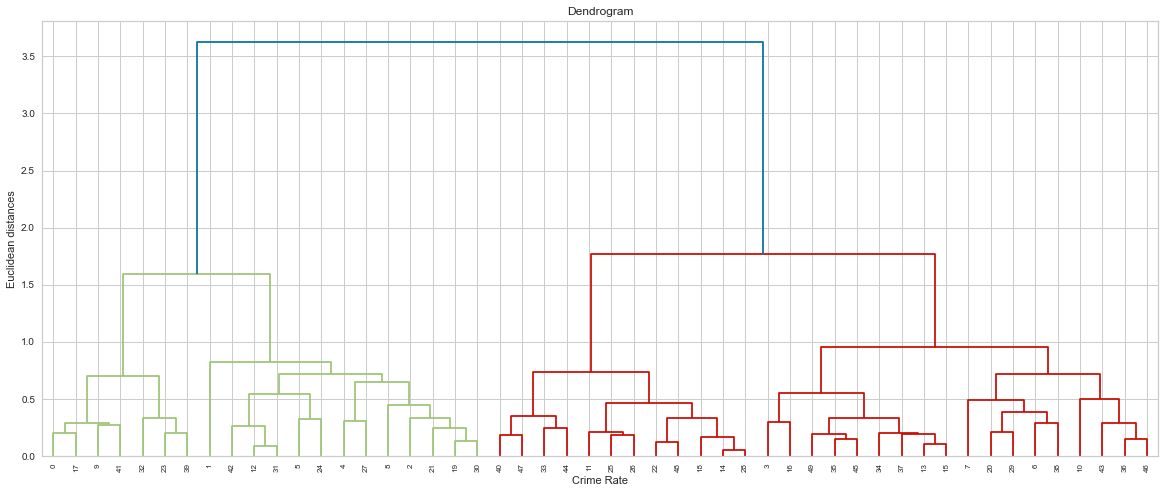

In [123]:
# With Ward method
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

In [124]:
# Fit the Agglomerative Clustering
AC=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

In [125]:
y_pred=AC.fit_predict(df_norm)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [128]:
#Fetch the cluster labels
crime['cluster labels']= y_pred

In [129]:
crime = crime.rename(columns={'Unnamed: 0': 'State'})

In [130]:
#Let's see which State falls in which cluster
crime[['State','cluster labels']]

,State,cluster labels
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,1
8,Florida,0
9,Georgia,0


<AxesSubplot:xlabel='cluster labels', ylabel='Murder'>

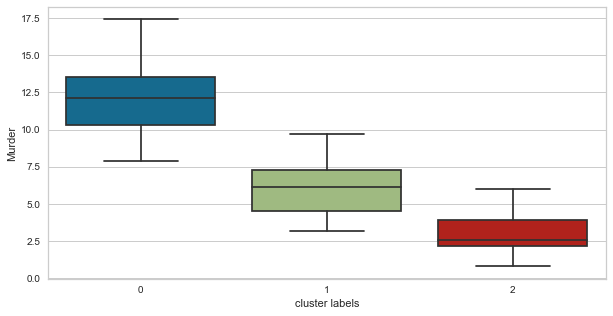

In [131]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels' , y='Murder', data=crime)

<AxesSubplot:xlabel='cluster labels', ylabel='Rape'>

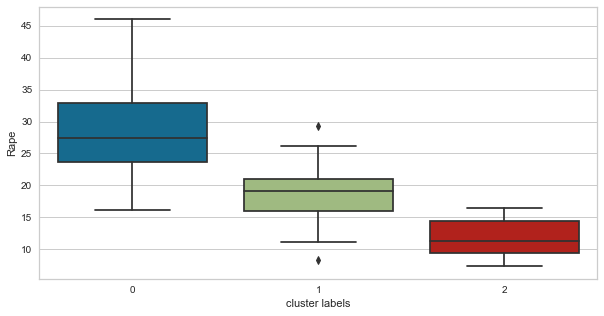

In [132]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=crime)

<AxesSubplot:xlabel='cluster labels', ylabel='Assault'>

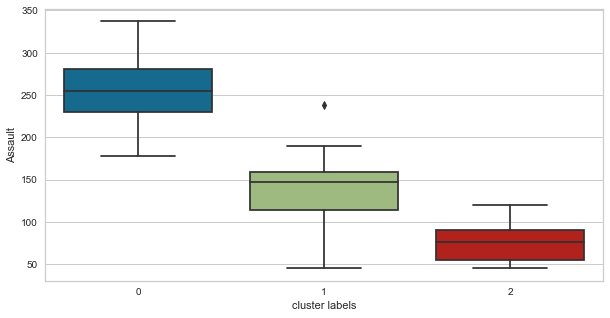

In [133]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels',y='Assault', data = crime)

In [134]:
Safe_Zone= crime.groupby('cluster labels')['State'].unique()[0]
Safe_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado',
       'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico',
       'New York', 'North Carolina', 'South Carolina', 'Tennessee',
       'Texas'], dtype=object)

In [135]:
Danger_Zone= crime.groupby('cluster labels')['State'].unique()[1]
Danger_Zone

array(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana',
       'Kansas', 'Kentucky', 'Massachusetts', 'New Jersey', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah',
       'Virginia', 'Washington', 'Wyoming'], dtype=object)

In [136]:
Moderate_Zone= crime.groupby('cluster labels')['State'].unique()[2]
Moderate_Zone

array(['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont',
       'West Virginia', 'Wisconsin'], dtype=object)

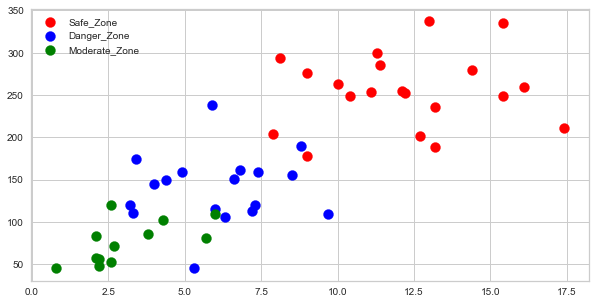

In [137]:

plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()


## 3) Solve By Using DBSCAN

In [138]:
#Import necessary Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [139]:
# Import .csv file and convert it to a DataFrame object
crime= pd.read_csv("crime.csv", index_col=0)

In [140]:
print(crime.head())

            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6


In [141]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


In [142]:
array =crime.values

In [143]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [144]:
#if we do standscaler range of th values is -3 to 3
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [145]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [146]:
dbscan = DBSCAN(eps=0.8, min_samples=4) # eps = radius
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=4)

In [147]:
#Noisy samples are given the label -1
dbscan.labels_ # -1 represent noice

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [148]:
cl=pd.DataFrame(dbscan.labels_,columns=['clusters'])

In [149]:
cl

,clusters
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [150]:
pd.concat([crime,cl], axis=1)

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236.0,58.0,21.2,NaN
Alaska,10.0,263.0,48.0,44.5,NaN
Arizona,8.1,294.0,80.0,31.0,NaN
Arkansas,8.8,190.0,50.0,19.5,NaN
California,9.0,276.0,91.0,40.6,NaN
...,...,...,...,...,...
45,NaN,NaN,NaN,NaN,0.0
46,NaN,NaN,NaN,NaN,-1.0
47,NaN,NaN,NaN,NaN,-1.0
48,NaN,NaN,NaN,NaN,0.0


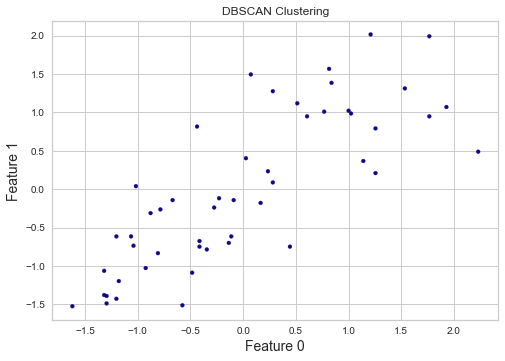

In [151]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into 3 clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma",s=15)
plt.xlabel("Feature 0",fontsize=14)
plt.ylabel("Feature 1", fontsize=14)
plt.title("DBSCAN Clustering")
plt.show()